**Проект: использование средств Python для расчёта и визуализации статистических свойств выборки**

Выборка — задача многоклассовой классификации [ирисов Фишера](https://).

In [1]:
from sklearn import datasets
iris = datasets.load_iris()

In [2]:
dataset = iris['data']

In [3]:
target = iris['target']

1. Посчитать основные характеристики выборки по каждому признаку:
- среднее;
- дисперсия;
- минимум;
- максимум;
- размах.

In [4]:
import numpy as np

*Среднее*

In [18]:
mean = np.mean(dataset, axis=0)
print(f'среднее - {mean}')

среднее - [5.84333333 3.05733333 3.758      1.19933333]


*Дисперсия*

In [26]:
var = np.var(dataset, axis=0)
print(f'Дисперсия - {var}')

Дисперсия - [0.68112222 0.18871289 3.09550267 0.57713289]


*Минимум*

In [25]:
minimum = np.min(dataset, axis=0)
print(f'Минимум - {minimum}')

Минимум - [4.3 2.  1.  0.1]


*Максимум*

In [24]:
maximum = np.max(dataset, axis=0)
print(f'Максимум - {maximum}')

Максимум - [7.9 4.4 6.9 2.5]


In [27]:
stds = np.std(dataset, axis=0)
stds

array([0.82530129, 0.43441097, 1.75940407, 0.75969263])

In [28]:
np.sqrt(var) == stds

array([ True,  True,  True,  True])

2. Визуализировать распределения признаков посредством seaborn.

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

График окрашивает наблюдения отдельной категориальной переменной. Например, набор данных iris содержит четыре измерения для каждого из трех разных видов цветов ириса, чтобы можно было видеть, чем они отличаются.

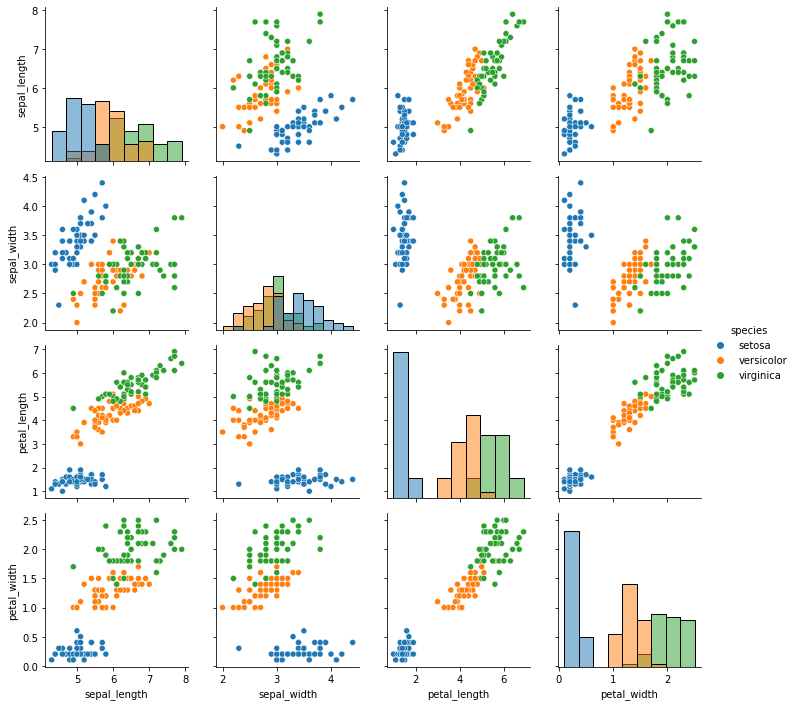

In [45]:
g = sns.PairGrid(iris, hue="species")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

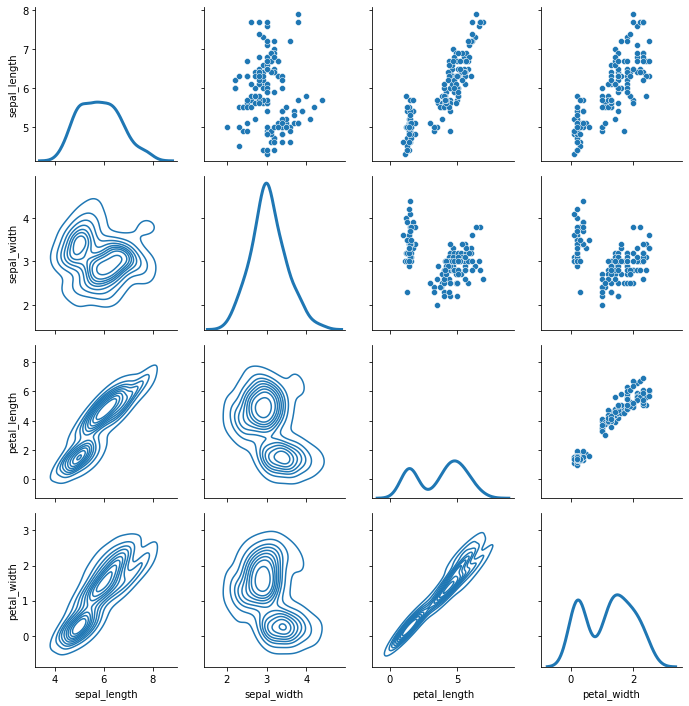

In [46]:
g = sns.PairGrid(iris)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False)

Выделим отдельные таблицы под каждый тип цветка

In [48]:
setosa = iris.loc[iris.species == 'setosa']
virginica = iris.loc[iris.species == 'virginica']
versicolor = iris.loc[iris.species == "versicolor"]

Построим для них ядерную оценку плотности

/home/alex/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/alex/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/alex/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


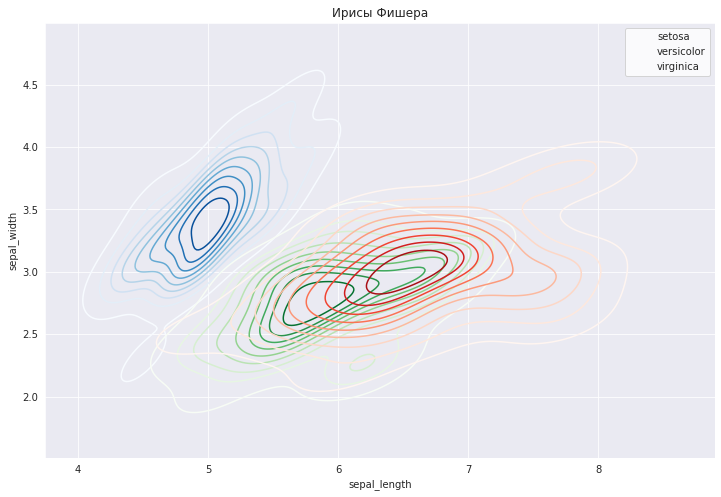

In [52]:
plt.figure(figsize=(12, 8))
with sns.axes_style("darkgrid"):
    ax = sns.kdeplot(setosa.sepal_length, setosa.sepal_width, 
                     label="setosa", cmap='Blues')
    ax = sns.kdeplot(versicolor.sepal_length, versicolor.sepal_width, 
                     label="versicolor", cmap='Greens')
    ax = sns.kdeplot(virginica.sepal_length, virginica.sepal_width, 
                     label="virginica", cmap='Reds')
    ax.set_title("Ирисы Фишера");
    ax.legend().get_frame().set_facecolor("white");

Четко видно три разных цветка

Значит, для классификации цветков можно использовать т.н. обобщённо-линейные модели — а именно, т.н. логистическую регрессию.

<AxesSubplot:>

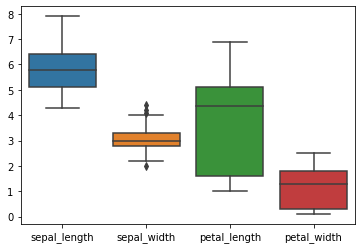

In [55]:
sns.boxplot(data=iris)

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

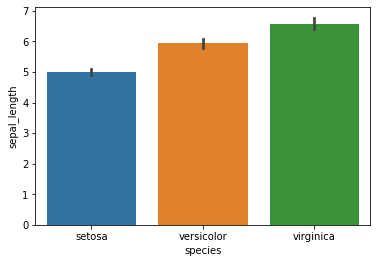

In [56]:
sns.barplot(data=iris, x='species', y='sepal_length')


<AxesSubplot:xlabel='species', ylabel='sepal_width'>

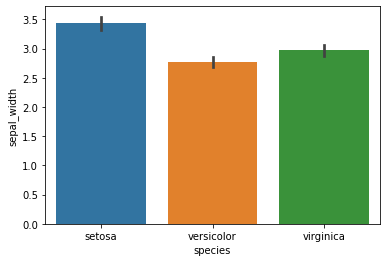

In [58]:
sns.barplot(data=iris, x='species', y='sepal_width')

<AxesSubplot:xlabel='species', ylabel='petal_width'>

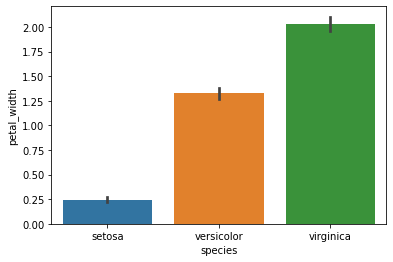

In [61]:
sns.barplot(data=iris, x='species', y='petal_width')


<AxesSubplot:xlabel='species', ylabel='petal_length'>

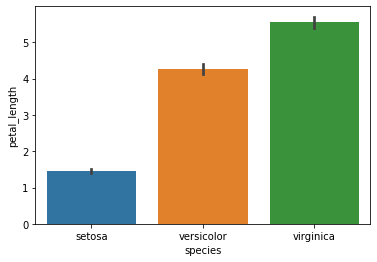

In [62]:
sns.barplot(data=iris, x='species', y='petal_length')


3. Посчитать и визуализировать корреляционную матрицу.

In [65]:
import pandas as pd

In [75]:
correl = iris.iloc[:, 0:4].corr()
correl

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


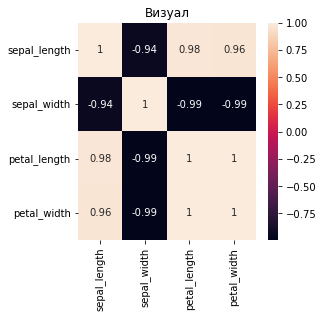

In [77]:
plt.figure(figsize=(4, 4))
sns.heatmap(correl.corr(), annot=True)
plt.title("Визуал");

4. Проверить гипотезу о нормальности распределения для признаков 1 и 2.

In [10]:
from scipy import stats

In [11]:
pass

5. Произвести расчёт статистик из пункта 1 для каждого значения таргета (группировка).

In [12]:
pass

6. Написать функцию, автоматизирующую EDA.

In [13]:
pass

7. Описать основные выводы по каждому разделу проекта. Какие выводы можно сделать на основе проведённого анализа?

In [14]:
pass